<a href="https://colab.research.google.com/github/paolotuazon26/EE-298-Z---Assignment-1/blob/master/3LayerCNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 16, 16)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 32, 8, 8)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 8, 8)          9248      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 32, 4, 4)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 512)               0         
__________

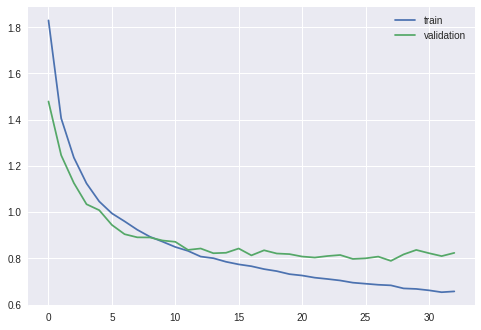

In [21]:
# With early stopping, 72.8%
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import cifar10
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot


# load CIFAR10 Data set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
no_classes = 10

num_labels = len(np.unique(y_train))


y_train = to_categorical(y_train, no_classes)
y_test = to_categorical(y_test, no_classes)

# image dimensions (assumed square), RGB 

image_size = x_train.shape[1]
# resize and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 3)
batch_size = 64
dropout = 0.2
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 500
sgd = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience = 5)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Fit the model
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=[es,mc])
# Final evaluation of the model
saved_model = load_model('best_model_cnn.h5')
score_train = model.evaluate(X_train, y_train, verbose=0)
score_test = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.1f%%, Test: %.1f%%' % (100*score_train[1], 100*score_test[1]))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()